In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans

In [2]:
train = pd.read_csv('product_train.csv')

In [3]:
train = train.dropna()

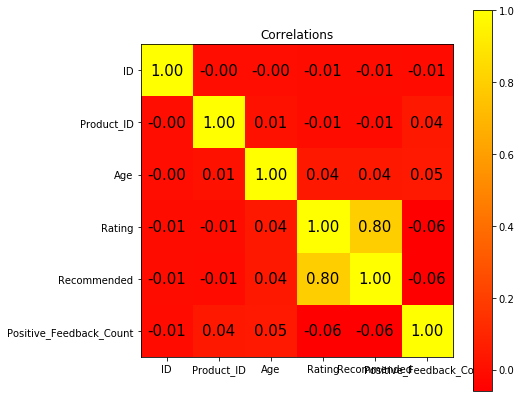

In [9]:
train = train[['ID', 'Product_ID', 'Age', 'Rating', 'Recommended', 'Positive_Feedback_Count']]
c = train.corr()
n_var = len(c)

# Plot the heatmap 
plt.figure(figsize=(7, 7))
plt.imshow(c, cmap = 'autumn')

plt.xticks(range(n_var), c.columns)
plt.yticks(range(n_var), c.columns)

for i in range(n_var):
    for j in range(n_var):
        plt.text(i, j, '{:.2f}'.format(c.iloc[i, j]), ha="center", va="center", 
                 color="k", fontsize=15)
        
# Add colorbar
plt.colorbar()

plt.title('Correlations')
plt.show()

In [5]:
c

,ID,Product_ID,Age,Rating,Recommended,Positive_Feedback_Count
ID,1.000000,-0.004422,-0.004603,-0.007683,-0.007917,-0.010517
Product_ID,-0.004422,1.000000,0.014222,-0.009454,-0.009846,0.040578
Age,-0.004603,0.014222,1.000000,0.042983,0.041570,0.048295
Rating,-0.007683,-0.009454,0.042983,1.000000,0.796125,-0.055805
Recommended,-0.007917,-0.009846,0.041570,0.796125,1.000000,-0.059170
Positive_Feedback_Count,-0.010517,0.040578,0.048295,-0.055805,-0.059170,1.000000


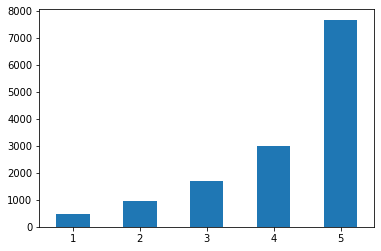

In [14]:
train["Rating"].value_counts().sort_index().plot.bar(rot=0)

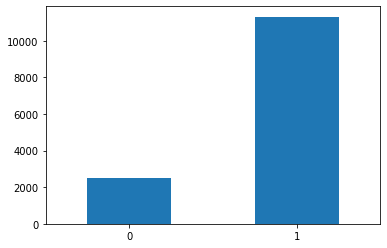

In [15]:
train["Recommended"].value_counts().sort_index().plot.bar(rot=0)

In [16]:
train.head()

,ID,Product_ID,Age,Rating,Recommended,Positive_Feedback_Count
0,12906,984,57,4,1,1
1,22440,872,60,5,1,3
2,13965,862,35,5,1,0
5,19166,1121,25,1,0,4
6,12522,1059,25,5,1,3


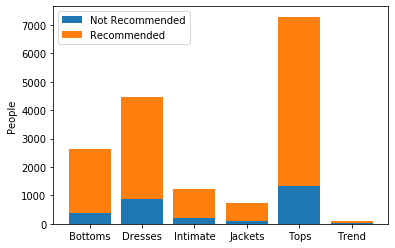

In [25]:
new_train = pd.read_csv('product_train.csv')
new_train = pd.crosstab(new_train['Department'], new_train['Recommended'])

plt.bar(range(len(new_train)), new_train[0], label='Not Recommended')
plt.bar(range(len(new_train)), new_train[1], bottom=new_train[0], label='Recommended')

plt.xticks(range(len(new_train)), new_train.index.values)
plt.ylabel('People')

plt.legend()

plt.show()

In [18]:
new_train

Recommended,0,1
Department,,
Bottoms,381,2239
Dresses,865,3610
Intimate,189,1046
Jackets,114,618
Tops,1325,5963
Trend,19,62


In [26]:
df = pd.read_csv('product_train.csv')
df.head()

,ID,Product_ID,Age,Review_Title,Review_Text,Rating,Recommended,Positive_Feedback_Count,Division,Department,Type
0,12906,984,57,Unique,"Just received and sorry to return. i am 5'9"" i...",4,1,1,General Petite,Jackets,Jackets
1,22440,872,60,Simple beauty,This is a tts basic tee with the added flare o...,5,1,3,General Petite,Tops,Knits
2,13965,862,35,Love this top!,I am very happy with this shirt. i don't like ...,5,1,0,General,Tops,Knits
3,14369,829,45,NaN,"Really flattering cut, this shirt is perfect f...",5,1,0,General Petite,Tops,Blouses
4,505,833,56,NaN,Love the fabric & lace on this top. like other...,4,1,0,General,Tops,Blouses


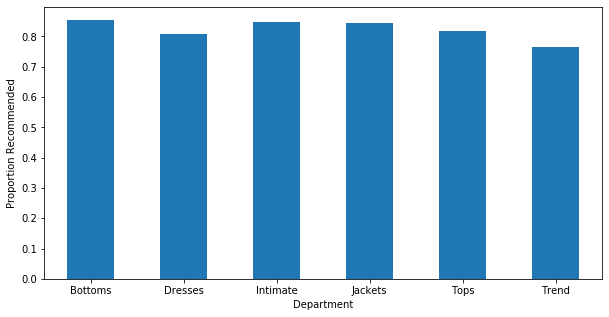

In [32]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

df.groupby("Department")["Recommended"].mean().plot.bar(ax=ax, rot=0)

ax.set_ylabel("Proportion Recommended");

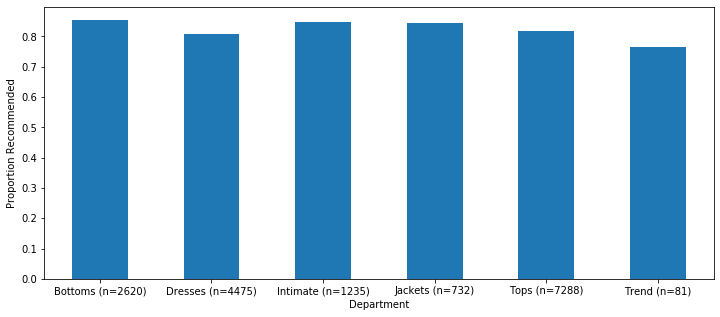

In [33]:
fig, ax = plt.subplots(1, 1, figsize=(12, 5))

value_counts = df.value_counts("Department").sort_index()
x_ticks = [f"{label} (n={count})" for label, count in zip(value_counts.index, value_counts.values)]

averaged_recommended = df.groupby("Department")["Recommended"].mean()
averaged_recommended = averaged_recommended.reindex(value_counts.index)
averaged_recommended.index = x_ticks

# rot=0 is rotation of the x-ticks
averaged_recommended.plot(kind="bar", ax=ax, rot=0)

ax.set_xlabel("Department");
ax.set_ylabel("Proportion Recommended");

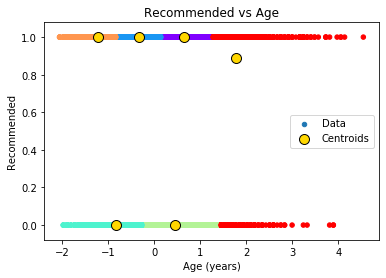

In [54]:
data = train[['Age', 'Recommended']].to_numpy(dtype='float64')

data[:, 0] = data[:, 0] - data[:, 0].mean()
data[:, 0] = data[:, 0] / data[:, 0].std()

kmeans = KMeans(n_clusters=6, random_state=0)
kmeans.fit(data)

labels = kmeans.labels_
centroids = kmeans.cluster_centers_

plt.scatter(data[:,0], data[:,1], s=20, c=labels, cmap="rainbow", label='Data')
plt.scatter(centroids[:, 0], centroids[:, 1], s=100, color='gold', edgecolors='black', 
            label='Centroids')

plt.xlabel('Age (years)');
plt.ylabel('Recommended') 
plt.title('Recommended vs Age')

plt.legend()
plt.show()

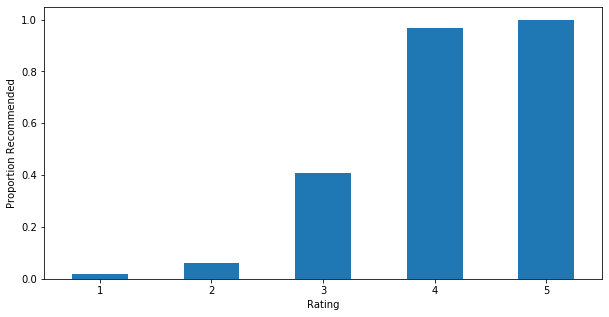

In [59]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

df.groupby("Rating")["Recommended"].mean().sort_index().plot.bar(rot=0)

ax.set_ylabel("Proportion Recommended");

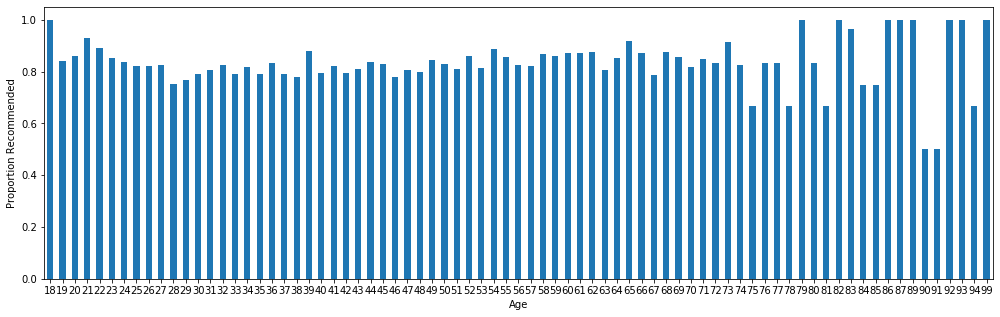

In [61]:
fig, ax = plt.subplots(1, 1, figsize=(17, 5))

df.groupby("Age")["Recommended"].mean().sort_index().plot.bar(rot=0)

ax.set_ylabel("Proportion Recommended");

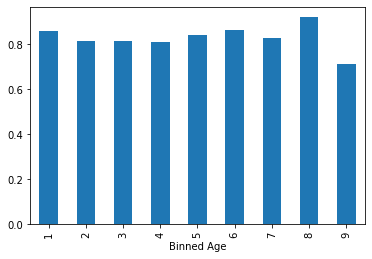

In [68]:
df["Binned Age"] = df["Age"] // 10

df.groupby("Binned Age")["Recommended"].mean().sort_index().plot.bar()

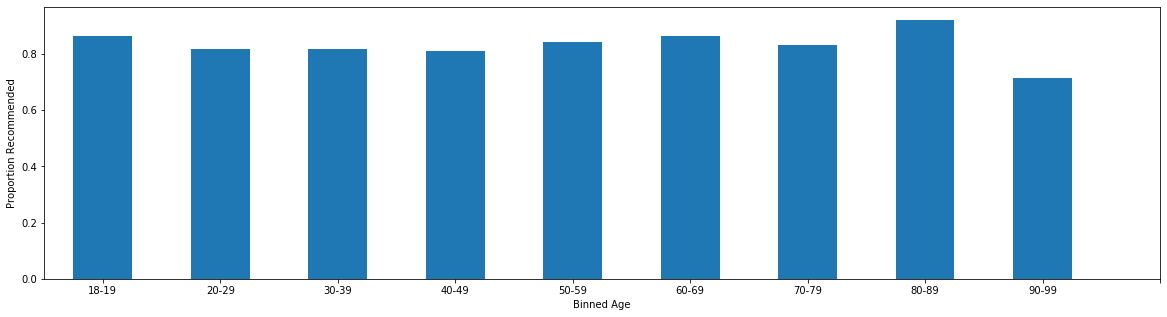

In [62]:
fig, ax = plt.subplots(1, 1, figsize=(20, 5))

df["Binned Age"] = df["Age"] // 10

averaged_recommended = df.groupby("Binned Age")["Recommended"].mean().sort_index()
averaged_recommended.plot(kind="bar", ax=ax, rot=0)

x_positions = np.arange(0, 10)
x_labels = ["18-19", "20-29", "30-39", '40-49', '50-59', '60-69', '70-79', '80-89', '90-99']
ax.set_xticks(x_positions)
ax.set_xticklabels(x_labels);
ax.set_ylabel("Proportion Recommended");

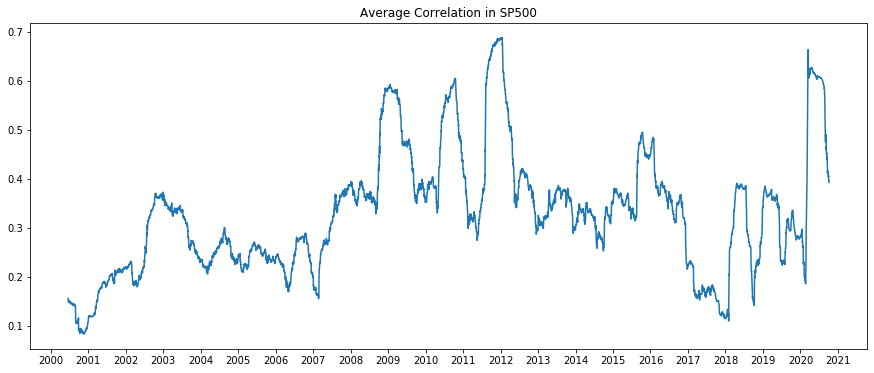

In [69]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

average_correlations = pd.read_csv("average_sp500_correlations.csv", parse_dates=True, index_col=0)

plt.figure(figsize=(15, 6))
plt.plot(average_correlations)
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.title("Average Correlation in SP500");

In [71]:
college = pd.read_csv("college.csv")
college.head()

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [72]:
college["Acceptance Rate"] = college["Accept"] / college["Apps"]

In [74]:
data = college.loc[:, ["Acceptance Rate", "Top10perc"]].copy()

standardized_data = (data - data.mean()) / data.std()

In [77]:
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(standardized_data)

labels = kmeans.labels_
centroids = kmeans.cluster_centers_

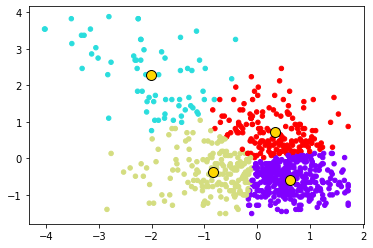

In [84]:
plt.scatter(standardized_data["Acceptance Rate"], standardized_data["Top10perc"], c=labels, 
            cmap="rainbow", label="Data", s=20)
plt.scatter(centroids[:, 0], centroids[:, 1], s=100, color='gold', edgecolors='black', 
            label='Centroids')

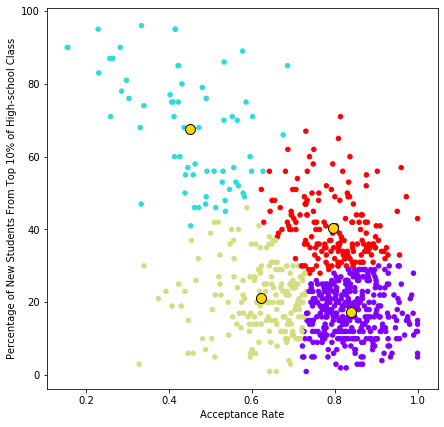

In [90]:
plt.figure(figsize=(7, 7))

unstandardized_centroids = (centroids * data.std().values) + data.mean().values

plt.scatter(data["Acceptance Rate"], data["Top10perc"], c=labels, 
            cmap="rainbow", label="Data", s=20)

plt.scatter(unstandardized_centroids[:, 0], unstandardized_centroids[:, 1], s=100, 
            color='gold', edgecolors='black', label='Centroids')

plt.xlabel('Acceptance Rate')
plt.ylabel('Percentage of New Students From Top 10% of High-school Class');

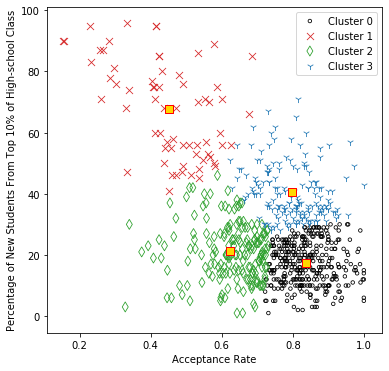

In [91]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

college = pd.read_csv('college.csv')
college['acceptance_rate'] = college['Accept']/college['Apps']

data = college[['acceptance_rate', 'Top10perc']].to_numpy()
mu = data.mean(axis = 0)
sigma = data.std(axis = 0)
data_scaled = (data - mu)/sigma

k = 4
kmeans = KMeans(n_clusters = 4, random_state = 0)
kmeans.fit(data_scaled)
labels = kmeans.labels_
centroids_scaled = kmeans.cluster_centers_

centroids = centroids_scaled * sigma + mu

markers = ['.', 'x', 'd', '1']
facecolors = ['none', 'tab:red', 'none', 'tab:blue']
edgecolors = ['black', 'none', 'tab:green', 'none']
plt.figure(figsize = (6, 6))
for i in range(k):
    x = college[labels == i]['acceptance_rate']
    y = college[labels == i]['Top10perc']
    if markers[i] == 'x' or markers[i] == '1':
        plt.scatter(x, y, marker = markers[i], linewidth = 0.8, s = 50, facecolor = facecolors[i], 
                    label=f"Cluster {i}")
    else:
        plt.scatter(x, y, marker = markers[i], linewidth = 0.8, s = 50, facecolor = facecolors[i], 
                    edgecolors = edgecolors[i], label=f"Cluster {i}")
plt.scatter(centroids[:, 0], centroids[:, 1], marker = 's', s = 80, color = 'gold', edgecolors = 'red')
plt.xlabel('Acceptance Rate')
plt.ylabel('Percentage of New Students From Top 10% of High-school Class')

plt.legend();

In [92]:
college["cluster"] = labels

In [95]:
college.head()

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,...,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,acceptance_rate,cluster
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,...,450,2200,70,78,18.1,12,7041,60,0.742169,0
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,...,750,1500,29,30,12.2,16,10527,56,0.880146,0
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,...,400,1165,53,66,12.9,30,8735,54,0.768207,0
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,...,450,875,92,97,7.7,37,19016,59,0.836930,3
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,...,800,1500,76,72,11.9,2,10922,15,0.756477,0


In [101]:
college.columns

Index(['Unnamed: 0', 'Private', 'Apps', 'Accept', 'Enroll', 'Top10perc',
       'Top25perc', 'F.Undergrad', 'P.Undergrad', 'Outstate', 'Room.Board',
       'Books', 'Personal', 'PhD', 'Terminal', 'S.F.Ratio', 'perc.alumni',
       'Expend', 'Grad.Rate', 'acceptance_rate', 'cluster'],
      dtype='object')

In [109]:
college.groupby("cluster")["Private"].value_counts(normalize=True).round(4) * 100

cluster  Private
0        Yes        72.22
         No         27.78
1        Yes        80.30
         No         19.70
2        Yes        58.89
         No         41.11
3        Yes        85.38
         No         14.62
Name: Private, dtype: float64

In [108]:
college.groupby("cluster")["Apps"].describe().round(1)

,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,360.0,1980.0,2692.4,100.0,551.8,964.5,2237.0,21804.0
1,66.0,6942.1,4997.7,708.0,2952.8,5351.5,8756.5,19873.0
2,180.0,3739.5,4643.0,213.0,1124.8,2252.5,4802.2,48094.0
3,171.0,2854.9,3460.9,81.0,947.5,1690.0,2771.0,20192.0
